In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from utils import load_jsonl_tuples

In [2]:
artists_df = load_jsonl_tuples('../data/v3/artists.jsonl')
sessions_df = load_jsonl_tuples('../data/v3/sessions.jsonl')
track_storage_df = load_jsonl_tuples('../data/v3/track_storage.jsonl')
tracks_df = load_jsonl_tuples('../data/v3/tracks.jsonl')
users_df = load_jsonl_tuples('../data/v3/users.jsonl')

# Analiza tabel

## Tabela artists

In [3]:
artists_df.head()

,id,name,genres
0,0cEZhqOizDuddhOL9xoIJi,Marguerite Viby,"(dansktop,)"
1,7H8ZC8uHJMPZGLMApRRNIz,Ligabue,"(europop, italian adult pop, italian pop rock)"
2,7o95ZoZt5ZYn31e9z1Hc0a,Natasha Bedingfield,"(dance pop, europop, neo mellow, pop, pop rap,..."
3,3HrbmsYpKjWH1lzhad7alj,Los Auténticos Decadentes,"(argentine rock, cuarteto, latin alternative, ..."
4,3Ar1W7H096Z6qSGBMmwSmO,Mikhail Shufutinsky,"(classic russian pop, russian chanson, russian..."


In [4]:
artists_df.info()
artists_df[artists_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27650 entries, 0 to 27649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27650 non-null  object
 1   name    27650 non-null  object
 2   genres  27650 non-null  object
dtypes: object(3)
memory usage: 648.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      0 non-null      object
 1   name    0 non-null      object
 2   genres  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [5]:
artists_df.isnull().sum()

id        0
name      0
genres    0
dtype: int64

## Tabela sessions

In [6]:
sessions_df.head()

,timestamp,user_id,track_id,event_type,session_id
0,2021-02-19T00:01:00.000000+02,101,18MKXumRZphEqOmNo2jEDa,Play,124
1,2021-02-19T00:02:02.325000+02,101,18MKXumRZphEqOmNo2jEDa,Skip,124
2,2021-02-19T00:02:02.325000+02,101,5p82122aabjw7bNy3ZVE28,Play,124
3,2021-02-19T00:07:52.122000+02,101,5f8TwGRFHq2B7wWPRwL7pW,Play,124
4,2021-02-19T00:10:37.922000+02,101,1Lx5aNjRapHLQmxATMqO4N,Play,124


In [7]:
sessions_df.info()
sessions_df[sessions_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14537071 entries, 0 to 14537070
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   timestamp   object
 1   user_id     int64 
 2   track_id    object
 3   event_type  object
 4   session_id  int64 
dtypes: int64(2), object(3)
memory usage: 554.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   0 non-null      object
 1   user_id     0 non-null      int64 
 2   track_id    0 non-null      object
 3   event_type  0 non-null      object
 4   session_id  0 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 0.0+ bytes


In [8]:
sessions_df.isnull().sum()

timestamp     0
user_id       0
track_id      0
event_type    0
session_id    0
dtype: int64

event_type
Play             8423365
Skip             2523784
Advertisement    1908780
Like             1668507
BuyPremium         12635
Name: count, dtype: int64


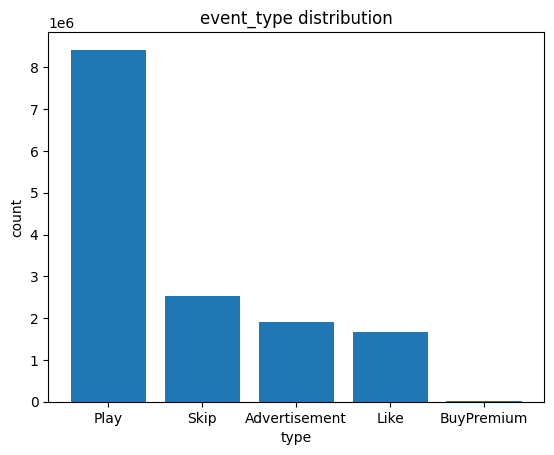

In [9]:
event_type_distribution = sessions_df['event_type'].value_counts()
print(event_type_distribution)

plt.bar(event_type_distribution.index, event_type_distribution.values)
plt.title('event_type distribution')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

## Tabela track_storage

In [10]:
track_storage_df.head()

,track_id,storage_class,daily_cost
0,6C0WWu7RYKbAgWUI3YC0sT,Slow,0.012479
1,4q7EBRq8ncztC2PRmEC7Fy,Slow,0.012737
2,7cNyONpVADZVrW9xe3qq4z,Slow,0.013967
3,1bKRTzTFz7wHMxpgZSuPR1,Slow,0.009685
4,56OEjuyZ3AROnv4aR1XqhD,Slow,0.009106


In [11]:
track_storage_df.info()
track_storage_df[track_storage_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   track_id       129648 non-null  object 
 1   storage_class  129648 non-null  object 
 2   daily_cost     129648 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_id       0 non-null      object 
 1   storage_class  0 non-null      object 
 2   daily_cost     0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [12]:
track_storage_df.isnull().sum()

track_id         0
storage_class    0
daily_cost       0
dtype: int64

array([[<Axes: title={'center': 'daily_cost'}>]], dtype=object)

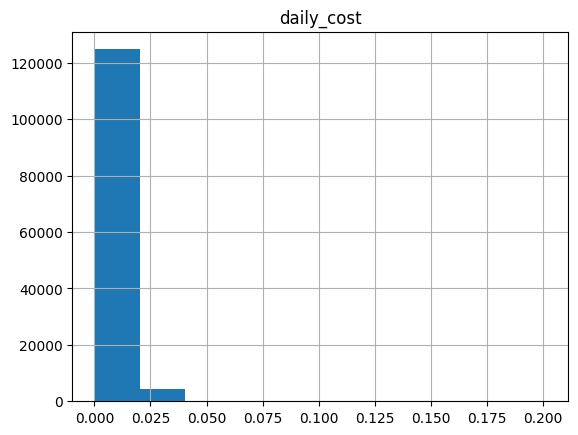

In [13]:
track_storage_df.hist()

storage_class
Slow      128182
Medium      1459
Fast           7
Name: count, dtype: int64


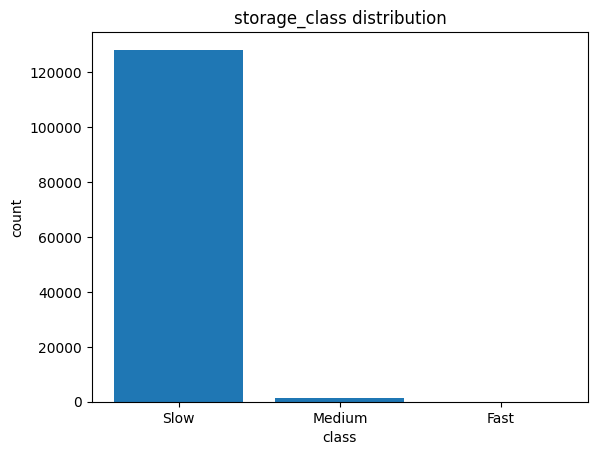

In [14]:
storage_class_distribution = track_storage_df['storage_class'].value_counts()
print(storage_class_distribution)

plt.bar(storage_class_distribution.index, storage_class_distribution.values)
plt.title('storage_class distribution')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

## Tabela tracks

In [15]:
tracks_df.head()

,id,artist_id,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC,Voglio farti un regalo,40,249573,1,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.119,0.633,97.865,4
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m,My Love - Live / Remastered,34,254733,0,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.956,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y,Heroes of Sand,45,279347,0,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.128,0.301,159.872,3
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY,Shine on Harvest Moon,6,193707,0,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.172,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9,男子漢,19,182120,0,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.241,0.317,100.041,4


In [16]:
tracks_df.info()
tracks_df[tracks_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129648 non-null  object 
 1   artist_id         129648 non-null  object 
 2   name              129648 non-null  object 
 3   popularity        129648 non-null  int64  
 4   duration_ms       129648 non-null  int64  
 5   explicit          129648 non-null  int64  
 6   release_date      129648 non-null  object 
 7   danceability      129648 non-null  float64
 8   energy            129648 non-null  float64
 9   key               129648 non-null  int64  
 10  mode              25930 non-null   float64
 11  loudness          129648 non-null  float64
 12  speechiness       129648 non-null  float64
 13  acousticness      129648 non-null  float64
 14  instrumentalness  129648 non-null  float64
 15  liveness          129648 non-null  float64
 16  valence           12

In [17]:
tracks_df.isnull().sum()

id                       0
artist_id                0
name                     0
popularity               0
duration_ms              0
explicit                 0
release_date             0
danceability             0
energy                   0
key                      0
mode                103718
loudness                 0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

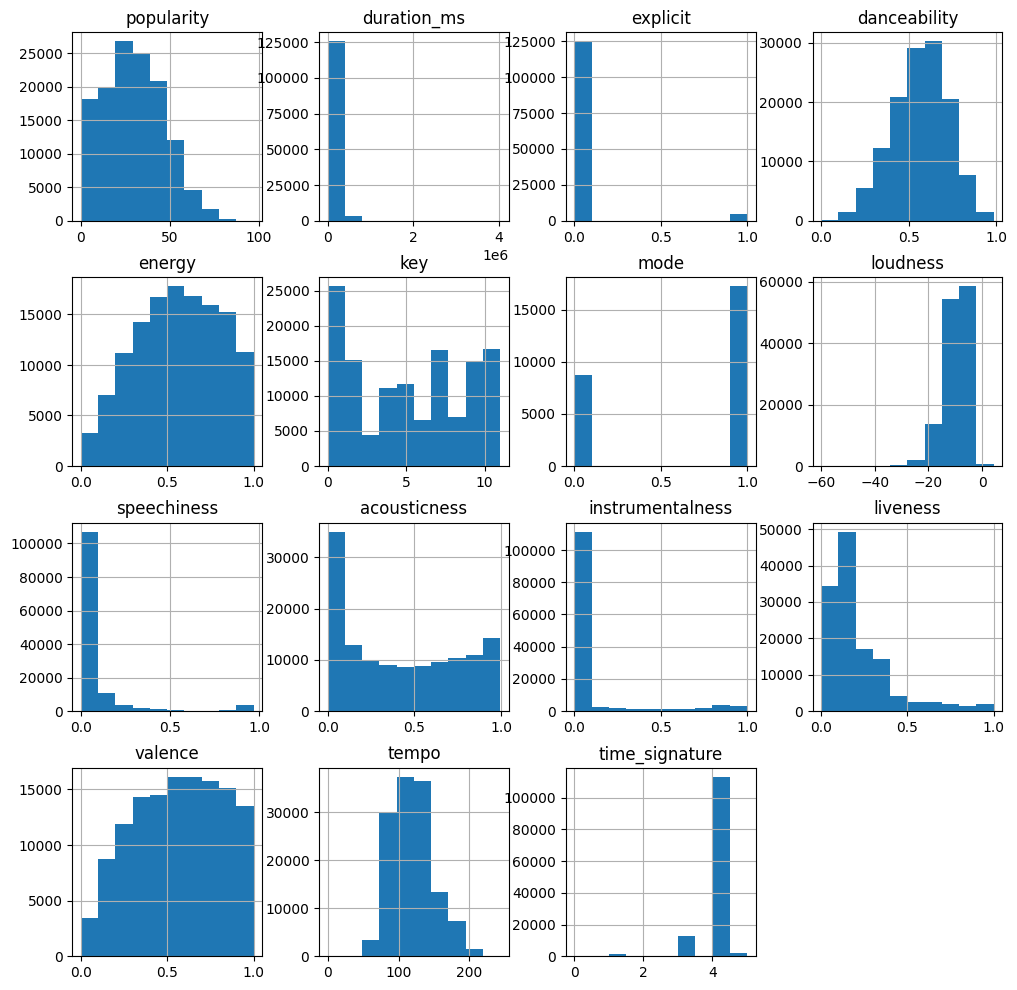

In [18]:
tracks_df.hist(figsize=(12, 12))

## Tabela users

In [19]:
users_df.head()

,user_id,name,city,street,favourite_genres,premium_user
0,101,Jerzy Tatarczyk,Wyszków,Błękitna 928,"(lounge, rock, motown)",False
1,102,Rozalia Kujda,Konin,Polna 670,"(mellow gold, permanent wave, latin rock)",False
2,103,Kazimierz Posłuszna,Żagań,Tęczowa 883,"(pop, ranchera, blues rock)",False
3,104,Witold Cyba,Legionowo,Jesionowa 50,"(new romantic, new wave, country rock)",False
4,105,Gustaw Bąkiewicz,Pruszków,Jeziorna 255,"(metal, rock en espanol, soul)",False


In [20]:
users_df.info()
users_df[users_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           30000 non-null  int64 
 1   name              30000 non-null  object
 2   city              30000 non-null  object
 3   street            30000 non-null  object
 4   favourite_genres  30000 non-null  object
 5   premium_user      30000 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           0 non-null      int64 
 1   name              0 non-null      object
 2   city              0 non-null      object
 3   street            0 non-null      object
 4   favourite_genres  0 non-null      object
 5   premium_user      0 non-null      bool  
dtypes: bo

In [21]:
users_df.isnull().sum()

user_id             0
name                0
city                0
street              0
favourite_genres    0
premium_user        0
dtype: int64

premium_user
True     12635
False    17365
Name: count, dtype: int64


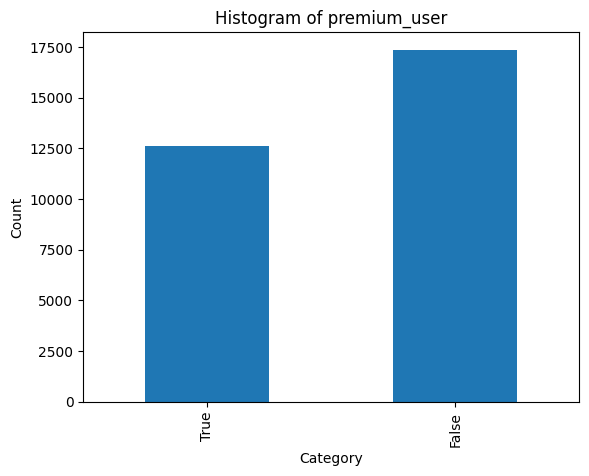

In [22]:
import numpy as np

counts = users_df['premium_user'].value_counts(dropna=False)

categories = [True, False]
counts = counts.reindex(categories, fill_value=0)

print(counts)

counts.plot(kind='bar')
plt.title('Histogram of premium_user')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



# Cel biznesowy
Celem zlecenia jest stworzenie systemu sztucznej inteligencji umożliwiającego przewidzenie, czy użytkownik platformy do streamingu audio jest skłonny zakupić konto premium, które wyłącza reklamy między utworami.

### Plan rozwiązania
Produkt zostanie oparty na klasyfikatorze binarnym wskazującym, czy użytkownik spełnia, lub nie, charakterystykę osoby skłonnej do posiadania statusu premium. Priorytetem będzie zdobycie jak najbardziej kompletnych danych, a następnie wyselekcjonowanie cech, które mają największy wpływ na użytkownika w jego decyzji. Do tego zadania zostanie użyty pierwszy model o bardziej ogólnej architekturze. Po selekcji przystąpimy do opracowania architektury, dostrojenia hiperparametrów itp., w celu maksymalizacji dokładności modelu.

### Dane
- Tabela users zawiera 3000 rekordów z lekko niezbalansowanymi liczebnościami użytkowników premium i non premium. Dane będą dobre do uczenia modelu bez potrzeby dodatkowych zmian. 
- W tabeli sessions mamy dobry wynikający z naturalnej częstotliwości rozkład wydarzeń oraz ponad 1000 sytuacji zakupu konta premium co powinno być dobrą reprezentacją zjawiska i dobrym zestawem danych uczących.
- Informacje o sesjach użytkowników zawierających event_type buy_premium będą jednymi z cenniejszych źródeł informacji, ich liczba nadal pozostaje bardzo mniejszościowa w stosunku do innych danych, konieczne będzie rozważenie undersamplingu/oversamplingu.
- Dane są spójne i kompletne, bez wartości błędnych, dzięki czemu nie będzie konieczna korekta danych wejściowych.

### Wejścia
Tabela Artists:
- Popularność artystów może wpływać na subskrypcje premium, ale może również być zmienna ze względu na trendy. W związku z tym zdecydowaliśmy się nie używać informacji o konkretnych artystach w modelu, aby uniknąć wpływu na stabilność i trwałość modelu.
- Kwestia zachowania danych o gatunkach (genres) pozostaje otwarta do analizy w późniejszym etapie projektu, gdyż mogą one dostarczyć cennych informacji na temat preferencji użytkowników.

Tabela Sessions:
- Na obecnym etapie nie wykluczamy żadnych pól z tej tabeli. Dane z tej tabeli mogą być kluczowe w tworzeniu ostatecznego zbioru danych.

Tabela Track Storage:
- Wykluczamy dane z tej tabeli, ponieważ mają wątpliwy wpływ na decyzję klienta o zakupie subskrypcji premium.

Tabela Tracks:
- Tabela zawiera istotne pola, takie jak popularność utworów, które mogą dostarczyć cennych informacji dla modelu.
- Wiele pól tabeli jest niezbalansowanych, dlatego rozważamy różne metody balansowania danych. Jeśli dane nie zostaną zbalansowane, niektóre pola mogą zostać usunięte.
- Pola powinny zostać dokładnie przeanalizowane pod względem korelacji, aby ustalić ostateczny zestaw istotnych informacji do modelu przy tworzeniu ostatecznego zbioru danych.

Tabela Users:
- Pola takie jak Name i Street nie będą używane w modelu, ponieważ mogą być przypadkowe lub prowadzić do fałszywych korelacji.
- Zachowamy pole City, ale rozważymy różne sposoby potencjalnego zakodowania tej informacji.

### Kryterium sukcesu
Założeniem pozwalającym uznać, że rozwiązanie działa prawidłowo, będzie uzyskanie ROC AUC większego niż 0.5 (lepiej niż strzał losowy) maksymalizując wartości True Positive i minimalizując False Negative (False Positive i True Negative nie mają dużego znaczenia). Model będzie posiadał prostą architekturę i będzie miał za zadanie przede wszystkim pomóc w wyselekcjonowaniu najlepszego zestawu cech do rozwiązania zadania.

Model naiwny zawsze zwracający wartość nieprawdy, w kontekście skłonności użytkownika do zakupu statusu premium, może osiągnąć skuteczność zbliżoną do 56% (w oparciu o obecną proporcję użytkowników nie posiadających statusu premium do wszystkich znanych). Nie jest on jednak w żadnym stopniu pomocny dla rozwiązania celu biznesowego. 

Dla bardziej złożonego rozwiązania oczekiwana jest ROC AUC powyżej 0.75 ze względu na spodziewaną dużą losowość danych uczących wynikajacych z natury problemu jakim jest analiza czynnika ludzkiego w tym zagadnieniu.

Z punktu widzenia biznesowego kryterium sukcesu, oczekiwany jest wzrost liczby użytkowników kupujących konto premium dzięki lepszemu dostosowaniu reklam i ofert biznesowych specyficznie do każdej osoby 